# Gender x Gender Analysis

From the main analysis file, we have found some specifics of Gender x Gender in the use of hedges, but let's just try to examine some specific words just for fun! I will be basing this off of the [study](https://nlp.stanford.edu/robvoigt/rtgender/rtgender.pdf) that this data is from, where they did something similar.

For this quick analysis, I'm going to examine some "stereotypical" words that I think people may use when interacting with different genders.

In [1]:
# import things
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# look at df from when we know both genders
# made up of fitocracy and some reddit
gender_visible_df = pd.read_pickle("gender_visible_df.pkl")
gender_visible_df.sample(5)

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges,post_questions,response_questions
335749,J_Mallory,M,Exactly_what_I_think,M,I agreed with you up until paternity confirmat...,Why should the man have no way of determining ...,reddit,"[I, agreed, with, you, up, until, paternity, c...","[Why, should, the, man, have, no, way, of, det...",49,57,24.500000,14.25,0,0,0,0
24877,61228,M,39582,M,"Hwy man, When are you going to post your next ...",Hey*,fitocracy,"[Hwy, man, ,, When, are, you, going, to, post,...",[Hey*],13,1,13.000000,1.00,0,0,0,0
336065,kandoras,M,allthe_gundams,M,Turns out it was the property of the SSgt in c...,Figures.,reddit,"[Turns, out, it, was, the, property, of, the, ...","[Figures, .]",73,2,24.333333,2.00,0,0,0,0
228176,1018874,W,1646457,W,Thanks for the follow! Following right back lo...,Thanks! Great to see so many women on here kic...,fitocracy,"[Thanks, for, the, follow, !, Following, right...","[Thanks, !, Great, to, see, so, many, women, o...",27,13,9.000000,6.50,0,0,0,0
80886,256801,W,256535,W,You're going to be awesome. Let me know if you...,I am trying to go up to the I-center mwf to wa...,fitocracy,"[You, 're, going, to, be, awesome, ., Let, me,...","[I, am, trying, to, go, up, to, the, I-center,...",46,29,11.500000,29.00,0,0,0,0


In [3]:
# stereotypical language
m_to_m = ['bro','dude','man']
f_to_f = ['girl','girly','girlie','chica'] # somewhat problematic... not as many that I can think of

### Male to male

In [4]:
def find_mtom(text):
    text = text.lower()
    if any(word in text for word in m_to_m):
        return 1
    else:
        return 0
    
gender_visible_df['m_to_m'] = gender_visible_df.response_text.map(find_mtom)

In [5]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).m_to_m.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 129264.0  0.129332  0.335569  0.0  0.0  0.0  0.0   
          W                 108075.0  0.040546  0.197237  0.0  0.0  0.0  0.0   
W         M                  88375.0  0.042818  0.202447  0.0  0.0  0.0  0.0   
          W                  71052.0  0.020900  0.143051  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

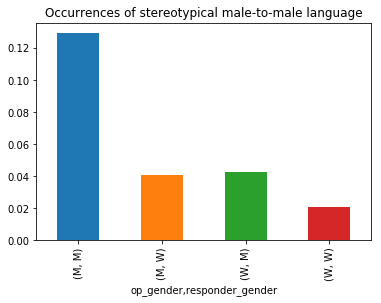

In [6]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).m_to_m.mean().plot(kind='bar',
                                        title='Occurrences of stereotypical male-to-male language')
plt.show()

As we can see, 'bro', 'dude', and 'man' are much more widely used in a male-to-male context.

### Female to female

In [7]:
def find_ftof(text):
    text = text.lower()
    if any(word in text for word in f_to_f):
        return 1
    else:
        return 0

gender_visible_df['f_to_f'] = gender_visible_df.response_text.map(find_ftof)

In [8]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 129264.0  0.022148  0.147167  0.0  0.0  0.0  0.0   
          W                 108075.0  0.010844  0.103570  0.0  0.0  0.0  0.0   
W         M                  88375.0  0.017878  0.132510  0.0  0.0  0.0  0.0   
          W                  71052.0  0.012245  0.109976  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

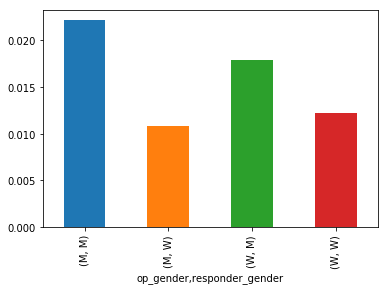

In [9]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.mean().plot(kind='bar')
plt.show()

Hm... these aren't really the results I'd like to see. Why are male responders using this seemingly female-to-female language so much more? Maybe they're using the word "girl" to talk about girls instead of address people as girls.

In [10]:
sample = gender_visible_df[(gender_visible_df.f_to_f == 1) &
                           (gender_visible_df.responder_gender == 'M')].sample(3)

for entry in sample.response_text:
    print(entry)
    print()

YEAH TAKE THAT GIRLS WE DONT WANT YOUR COOTIES

Good luck on your road to recovery! Take things slow and listen to your body. You GOT this girl!

Hey girl hey!



Yes, they don't really seem to be addressing people as girl. Let's get rid of this:

In [11]:
f_to_f = ['girly','girlie','chica']
gender_visible_df['f_to_f'] = gender_visible_df.response_text.map(find_ftof)
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 129264.0  0.000743  0.027242  0.0  0.0  0.0  0.0   
          W                 108075.0  0.000537  0.023160  0.0  0.0  0.0  0.0   
W         M                  88375.0  0.000950  0.030816  0.0  0.0  0.0  0.0   
          W                  71052.0  0.001506  0.038777  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

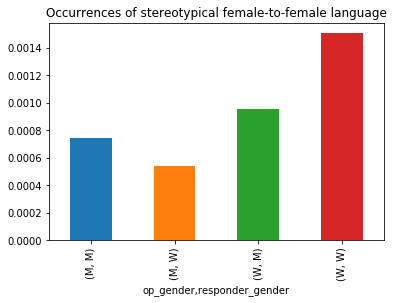

In [12]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.mean().plot(kind='bar',
                                            title='Occurrences of stereotypical female-to-female language')
plt.show()

So now there's way less occurrences of this female-to-female language, but it at least makes sense now.

### Examining random words

How about something like "beautiful"?

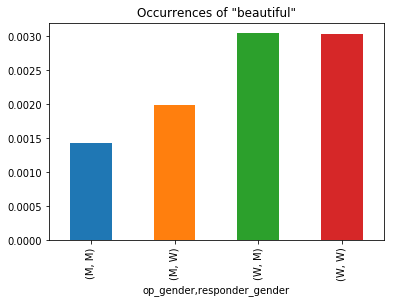

op_gender  responder_gender
M          M                   0.001423
           W                   0.001980
W          M                   0.003044
           W                   0.003026
dtype: float64

In [13]:
beautiful = gender_visible_df[gender_visible_df.response_text.str.contains('beautiful', case=False)]

# need to divide to normalize
(beautiful.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size()).plot(kind='bar',
                                                                          title='Occurrences of "beautiful"')
plt.show()

(beautiful.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size())

So it seems men call women beautiful the most, which is shortly followed by women to women.

Who uses "sexy"?

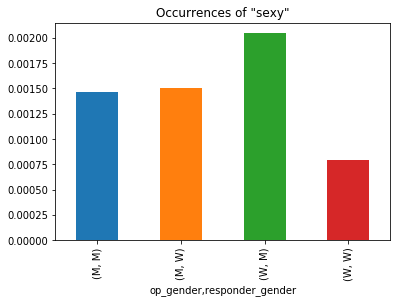

op_gender  responder_gender
M          M                   0.001462
           W                   0.001508
W          M                   0.002048
           W                   0.000788
dtype: float64

In [14]:
sexy = gender_visible_df[gender_visible_df.response_text.str.contains('sexy', case=False)]

# need to divide to normalize
(sexy.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size()).plot(kind='bar',
                                                                          title='Occurrences of "sexy"')
plt.show()

(sexy.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size())

The most is yet again male to female.

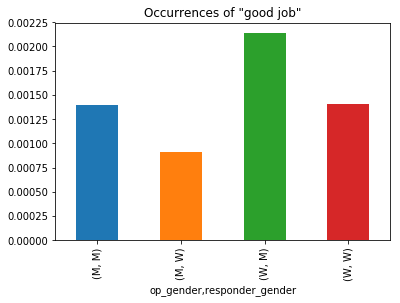

op_gender  responder_gender
M          M                   0.001462
           W                   0.001508
W          M                   0.002048
           W                   0.000788
dtype: float64

In [15]:
good_job = gender_visible_df[gender_visible_df.response_text.str.contains('good job', case=False)]

# need to divide to normalize
(good_job.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size()).plot(kind='bar',
                                                                          title='Occurrences of "good job"')
plt.show()

(sexy.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size())